<a href="https://colab.research.google.com/github/sans1012/Mall-Customer-Segmentation/blob/main/Mall_Spending_score_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import

In [ ]:
!pip install yellowbrick

In [ ]:
import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

# 2. Read file

In [ ]:
df=pd.read_csv("Mall_Customers.csv")

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 3.  Data Understanding

In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Data Visualization

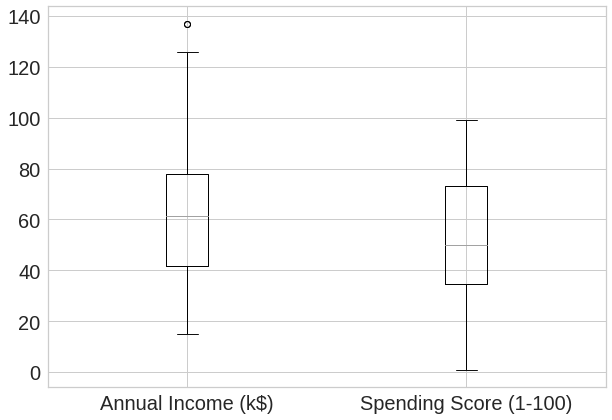

In [ ]:
plt.figure(figsize=(10,7))
df.boxplot(column=['Annual Income (k$)', 'Spending Score (1-100)'], fontsize=20);

Median os Spending Score is around 50 and annual income is over 60. There are some people with high annual income( which is our outlier)

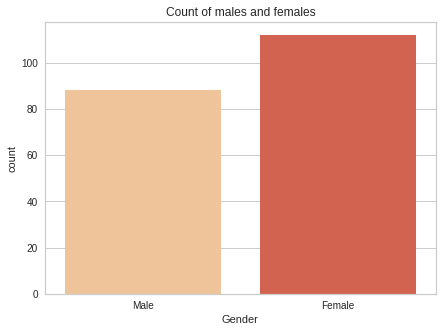

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x="Gender", data=df, palette="OrRd")
plt.title("Count of males and females")
plt.show()

Number of males visiting the mall is less than the number of females. Therefore to increase the mall's earning we can target the female customers more by introducing some schemes

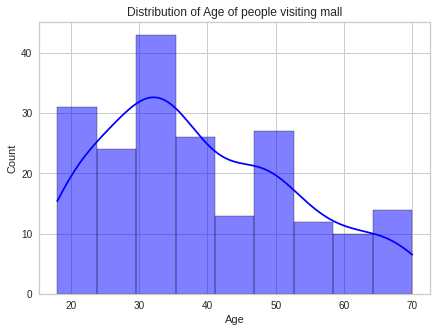

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df["Age"],kde=True,color='blue')
plt.title("Distribution of Age of people visiting mall")
plt.show()

the people of age group 30-40 are more likely to visit and spend money at mall. Older people are visiting mall less

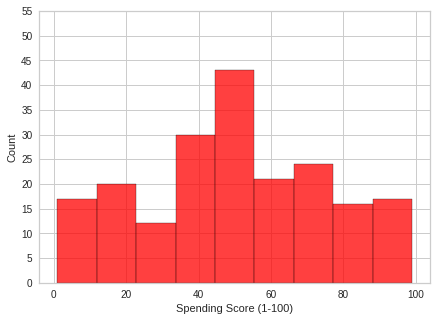

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(df['Spending Score (1-100)'],color='red')
plt.yticks(np.arange(0,60,5));
plt.grid(True)
plt.show()

Many people who are spending the money have the spending socre between 40-60

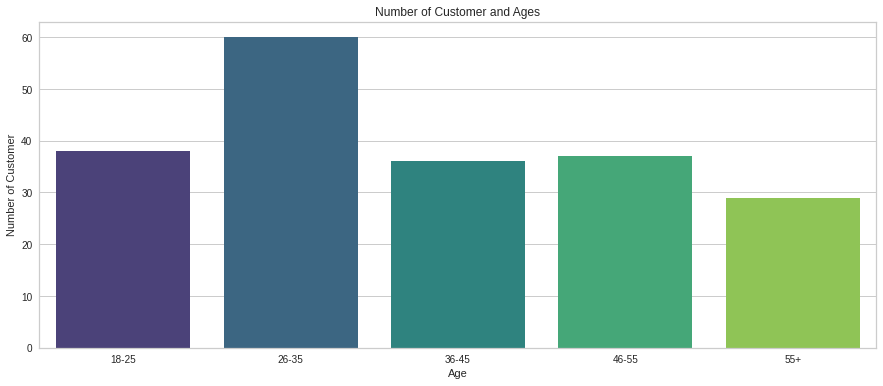

In [ ]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="viridis")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

A bar plot to check the distribution of number of customers in each age group. 

Clearly the 26–35 age group outweighs every other age group.

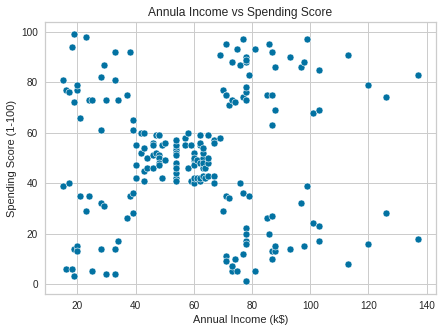

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)')
plt.title("Annula Income vs Spending Score")
plt.grid(True)
plt.show()

People who earn more(> 100 ) spend more.

people who earn less(<40) don't spend less. 

people who earn between(40-60$) have the average spending score 

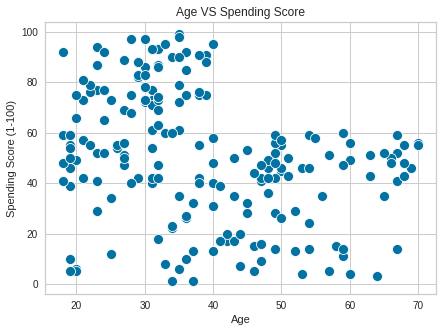

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=df['Age'],y=df['Spending Score (1-100)'],s=100, palette= "Pastel1")
plt.title("Age VS Spending Score")
plt.show()

People who are young spend more as compore to older people

### Droping the column CustomerId

In [ ]:
df.drop(['CustomerID'], axis=1, inplace=True)

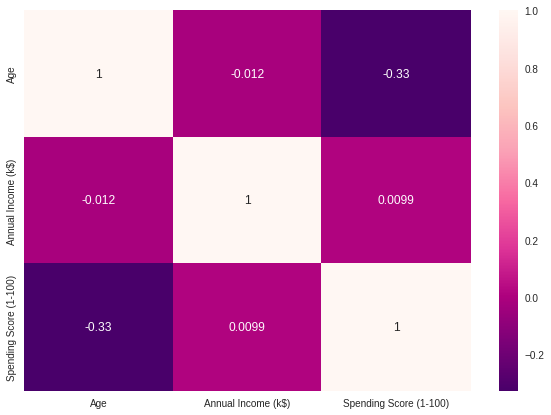

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap= "RdPu_r")

Spending Score and Annual Income has Positive correlation

Age and Spending Score has a negative correlation

# Building a K means model

In [ ]:
## This being a clustering problem, We don't need any dependent variable for data pre-processing.
##Currently we have no idea about what to determine. So we will just add a line of code for the matrix of features

xx = df.iloc[:, [2, 3]].values  
ssd=[]
for k in range(1,15):
    model=KMeans(n_clusters=k, init="k-means++", random_state=0)
    
    model.fit(xx)
    
    ssd.append(model.inertia_)
    

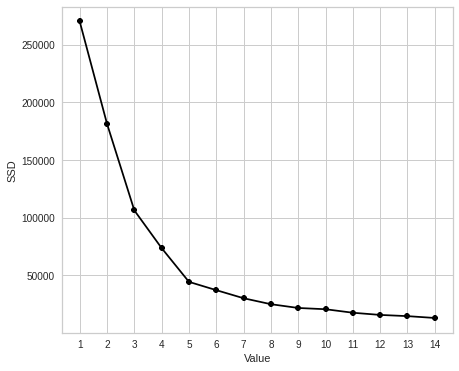

In [ ]:
plt.figure( 1,figsize=(7,6))
plt.plot(range(1,15), ssd, color="black", marker='8');
plt.grid(True)
plt.xlabel("Value");
plt.ylabel("SSD");
plt.xticks(np.arange(1,15,1));

In [ ]:
ssd

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37265.86520484346,
 30259.65720728547,
 25095.70320999756,
 21830.041978049434,
 20736.679938924128,
 17702.59593229628,
 15810.838613705502,
 14763.330402558204,
 13165.329070181628]

In [ ]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0              NaN
1    -88617.684040
2    -75015.222897
3    -32668.584023
4    -29231.333592
5     -7182.590243
6     -7006.207998
7     -5163.953997
8     -3265.661232
9     -1093.362039
10    -3034.084007
11    -1891.757319
12    -1047.508211
13    -1598.001332
dtype: float64

The sihoutte score is 0.31827029153316977
The sihoutte score is 0.46761358158775435
The sihoutte score is 0.4931963109249047
The sihoutte score is 0.553931997444648
The sihoutte score is 0.53976103063432
The sihoutte score is 0.5315303699289704
The sihoutte score is 0.4563394686110682
The sihoutte score is 0.4565077334305076
The sihoutte score is 0.4467356774401869
The sihoutte score is 0.44581460933978173
The sihoutte score is 0.44481208062285027
The sihoutte score is 0.43812939989659655
The sihoutte score is 0.4183246169803553
The sihoutte score is 0.41674640415082764


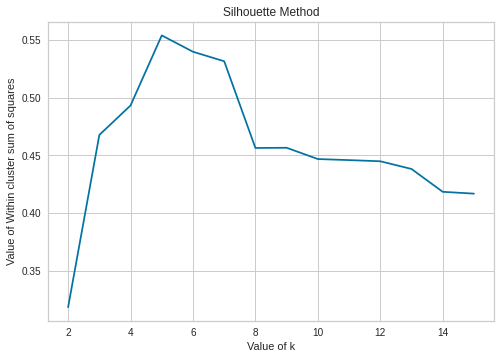

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 15

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(xx)
    labels = kmeans.labels_
    sil.append(silhouette_score(xx, labels, metric = 'euclidean'))
    coef = silhouette_score(xx, labels, metric = 'euclidean')
    print('The sihoutte score is {}'.format(coef))
plt.grid(True)
plt.plot(range(2,16),sil)
plt.xlabel("Value of k")
plt.ylabel("Value of Within cluster sum of squares")
plt.title("Silhouette Method")
plt.show()

# Silhouette Plots

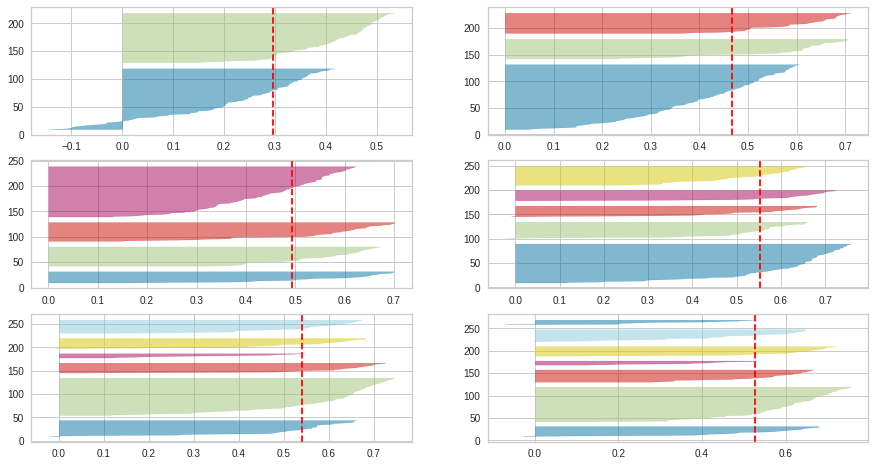

In [ ]:


fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(xx)

the silhoutte score for k = 6 is the highest, but the clusters for k = 5 are more uniform compared to k = 6. 

So choosing k = 5

### Taking the number of clusters= 5

In [ ]:
####Applying k means with selected value of k and training the K-means model on a dataset  

kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(xx)

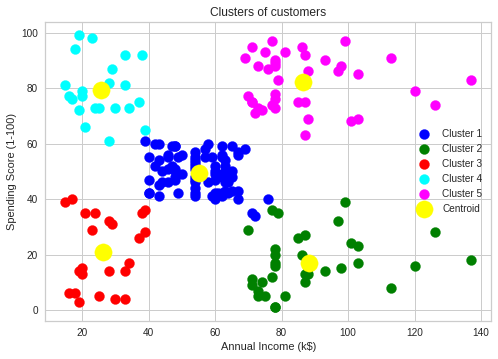

In [ ]:
###Visualizing the clusters

#Converting dataframe into array for boolean subsetting purpose for plotting
plt.scatter(xx[y_predict == 0, 0], xx[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(xx[y_predict == 1, 0], xx[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(xx[y_predict== 2, 0], xx[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(xx[y_predict == 3, 0], xx[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(xx[y_predict == 4, 0], xx[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster
#plt.scatter(xx[y_predict == 5, 0], xx[y_predict == 5, 1], s = 100, c = 'orange', label = 'Cluster 5') #for sixth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

Had we chosen k = 6, the two extreme pink points would have formed a separate cluster

In [ ]:
### Taking care of categorical variables
dataset = pd.get_dummies(df, drop_first = True)
dataset.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [ ]:
dataset.drop("Gender_Male", axis=1, inplace = True)
dataset.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


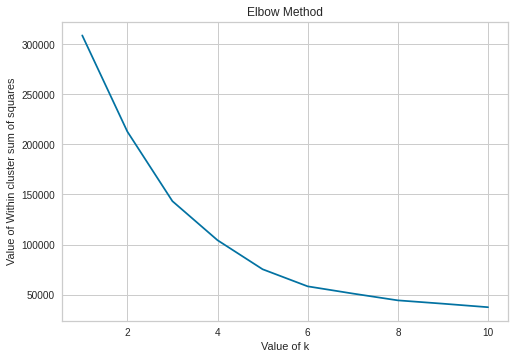

In [ ]:
#### applying elbow method like before to find out k
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel("Value of k")
plt.ylabel("Value of Within cluster sum of squares")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

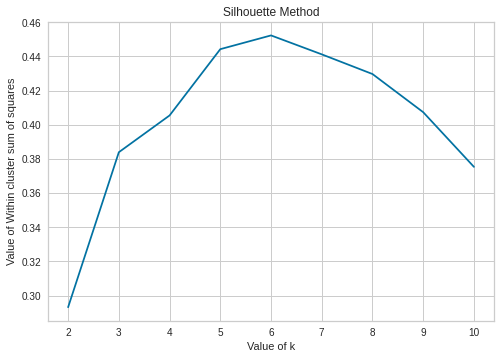

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(dataset)
    labels = kmeans.labels_
    sil.append(silhouette_score(dataset, labels, metric = 'euclidean'))
    
plt.plot(range(2,11),sil)
plt.xlabel("Value of k")
plt.ylabel("Value of Within cluster sum of squares")
plt.title("Silhouette Method")
plt.show()

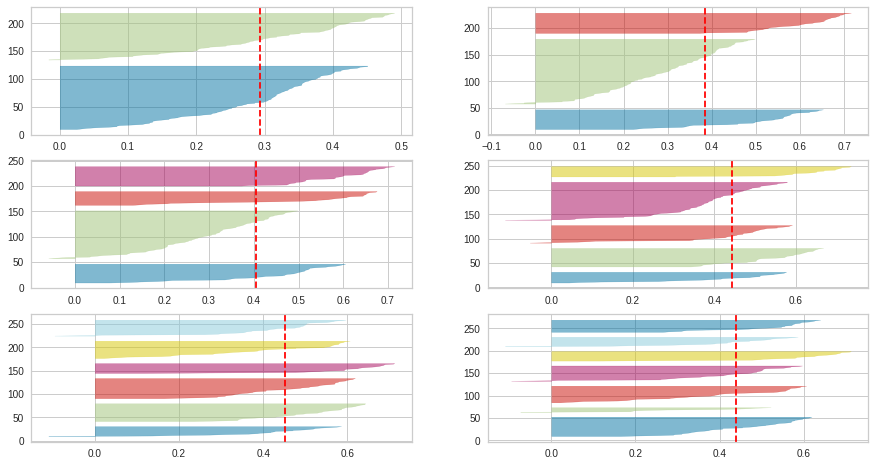

In [ ]:
import yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(dataset)

In [ ]:
coef = metrics.silhouette_score(dataset,kmeans.labels_)
print('The sihoutte score is {}'.format(coef))

The sihoutte score is 0.3753578686405622


### Taking the number of clusters= 6

In [ ]:
kmeans = KMeans(n_clusters= 6)
y_kmeans = kmeans.fit_predict(dataset)

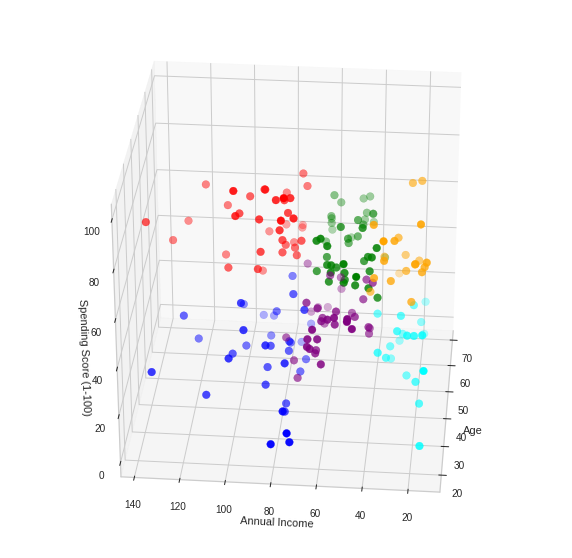

In [ ]:
#### visualizing the clustering

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset.Age[kmeans.labels_ == 0], dataset["Annual Income (k$)"][kmeans.labels_ == 0], dataset["Spending Score (1-100)"][kmeans.labels_ == 0], c='blue', s=60)
ax.scatter(dataset.Age[kmeans.labels_ == 1], dataset["Annual Income (k$)"][kmeans.labels_ == 1], dataset["Spending Score (1-100)"][kmeans.labels_ == 1], c='red', s=60)
ax.scatter(dataset.Age[kmeans.labels_ == 2], dataset["Annual Income (k$)"][kmeans.labels_ == 2], dataset["Spending Score (1-100)"][kmeans.labels_ == 2], c='green', s=60)
ax.scatter(dataset.Age[kmeans.labels_ == 3], dataset["Annual Income (k$)"][kmeans.labels_ == 3], dataset["Spending Score (1-100)"][kmeans.labels_ == 3], c='orange', s=60)
ax.scatter(dataset.Age[kmeans.labels_ == 4], dataset["Annual Income (k$)"][kmeans.labels_ == 4], dataset["Spending Score (1-100)"][kmeans.labels_ == 4], c='purple', s=60)
ax.scatter(dataset.Age[kmeans.labels_ == 5], dataset["Annual Income (k$)"][kmeans.labels_ == 5], dataset["Spending Score (1-100)"][kmeans.labels_ == 5], c='cyan', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

Looking at the analysis cluster 5 :

    (i) purple color cluster: are the people who earn high as well as spend high. 
    (ii) red color cluster: people spend high but their income is less. 
    (iii) blue color cluster: are kind of people who earn less and spend less.
For these three classes of people some discount offers can be generated to aim growth in sales.

     (iv) yelow color cluster: people earn high but do spend less. This is a point of concern for management. The reasons for this needs to be found out. It might be products at store , discounts , service etc. Once valid reasons found out management can incorporate solutions for rectifying it which might result in profits.
    (v) green color cluster: people who are old and spend less

In [ ]:
coef = metrics.silhouette_score(dataset,kmeans.labels_)
print('The sihoutte score is {}'.format(coef))

The sihoutte score is 0.4523443947724053
